In [6]:
import pandas as pd

# Load the two CSV files
df1 = pd.read_csv('2638_humor_annotated_no_squibs.csv')
df2 = pd.read_csv('32952_with_humor_label_no_squibs.csv')

# Check column names to make sure we're accessing the right ones
print("File 1 columns:", df1.columns.tolist())
print("File 2 columns:", df2.columns.tolist())

# Assuming columns are named 'title' and 'label' in the first file
# and 'abstract', 'title', 'humor_label' in the second file
# Rename columns if needed to match for merging
if 'humor_label' in df2.columns and 'label' not in df2.columns:
    df2 = df2.rename(columns={'humor_label': 'label'})

# Merge dataframes on title
merged_df = pd.merge(df1[['title', 'label']], 
                     df2[['abstract', 'title']],
                     on='title',
                     how='inner')

# Filter to keep only rows where label is 1
result_df = merged_df[merged_df['label'] == 1]

# Keep only the requested columns: abstract, title, and label
result_df = result_df[['abstract', 'title', 'label']]

# Save the result to a new CSV file
result_df.to_csv('merged_humor_data_label_1.csv', index=False)

# Print summary statistics
print(f"Original file 1 rows: {len(df1)}")
print(f"Original file 2 rows: {len(df2)}")
print(f"Matched rows: {len(merged_df)}")
print(f"Rows with label=1: {len(result_df)}")

File 1 columns: ['title', 'label']
File 2 columns: ['abstract', 'title', 'source', 'year', 'humor_label']
Original file 1 rows: 2638
Original file 2 rows: 32952
Matched rows: 2345
Rows with label=1: 488


I need you to perform a few task first based on this abstract and title categorize the title in one of the 20 categories mentioned below 

abstract :- 

"When scaled to hundreds of billions of parameters, pretrained language models such as GPT-3 (Brown et al., 2020) achieve remarkable few-shot performance. However, enormous amounts of compute are required for training and applying such big models, resulting in a large carbon footprint and making it difficult for researchers and practitioners to use them. We show that performance similar to GPT-3 can be obtained with language models that are much ""greener"" in that their parameter count is several orders of magnitude smaller. This is achieved by converting textual inputs into cloze questions that contain a task description, combined with gradient-based optimization; exploiting unlabeled data gives further improvements. We identify key factors required for successful natural language understanding with small language models.",It's Not Just Size That Matters: Small Language Models Are Also Few-Shot Learners,1

1. Anecdotal: Named after the word anecdote (which stems from the Greek term meaning “unpublished”); refers to comic personal stories that may be true or partly true but embellished.
2. Blue: Also called off-color, or risque (from the French word for “to risk”); relies on impropriety or indecency for comic effect. (The name probably derives from the eighteenth-century use of the word blue to refer to morally strict standards — hence the phrase “blue laws” to refer to ordinances restricting certain behavior on the Sabbath). A related type is broad humor, which refers to unrestrained, unsubtle humor often marked by coarse jokes and sexual situations.
3. Burlesque: Ridicules by imitating with caricature, or exaggerated characterization. The association with striptease is that in a bygone era, mocking skits and ecdysiastic displays were often on the same playbills in certain venues.
4. Dark/Gallows/Morbid: Grim or depressing humor dealing with misfortune and/or death and with a pessimistic outlook.
5. Deadpan/Dry: Delivered with an impassive, expressionless, matter-of-fact presentation.
6. Droll: From the Dutch word meaning “imp”; utilizes capricious or eccentric humor.
7. Epigrammatic: Humor consisting of a witty saying such as “Too many people run out of ideas long before they run out of words.” (Not all epigrams are humorous, however.) Two masters of epigrammatic humor are Benjamin Franklin (as the author of Poor Richard’s Almanackand Oscar Wilde.
8. Farcical: Comedy based on improbable coincidences and with satirical elements, punctuated at times with overwrought, frantic action. (It, like screwball comedy — see below — shares many elements with a comedy of errors.) Movies and plays featuring the Marx Brothers are epitomes of farce. The adjective also refers to incidents or proceedings that seem too ridiculous to be true.
9. High/highbrow: Humor pertaining to cultured, sophisticated themes.
10. Hyperbolic: Comic presentation marked by extravagant exaggeration and outsized characterization.
11. Ironic: Humor involving incongruity and discordance with norms, in which the intended meaning is opposite, or nearly opposite, to the literal meaning. (Not all irony is humorous, however.)
12. Juvenile/sophomoric: Humor involving childish themes such as pranks, name-calling, and other immature behavior.
13. Mordant: Caustic or biting humor (the word stems from a Latin word meaning “to bite”). Not to be confused with morbid humor (see above).
14. Parodic: Comic imitation often intended to ridicule an author, an artistic endeavor, or a genre.
15. Satirical: Humor that mocks human weaknesses or aspects of society.
16. Screwball: Akin to farce in that it deals with unlikely situations and responses to those situations; distinguished, like farcical humor, by exaggerated characterizations and episodes of fast-paced action.
17. Self-deprecating: Humor in which performers target themselves and their foibles or misfortunes for comic effect. Stand-up comedian Rodney Dangerfield was a practitioner of self-deprecating humor.
18. Situational: Humor arising out of quotidian situations; it is the basis of sitcoms, or situation comedies. Situational comedies employ elements of farce, screwball, slapstick, and other types of humor.
19. Slapstick: Comedy in which mock violence and simulated bodily harm are staged for comic effect; also called physical comedy. The name derives from a prop consisting of a stick with an attached piece of wood that slapped loudly against it when one comedian struck another with it, enhancing the effect. The Three Stooges were renowned for their slapstick comedy.
20. Stand-up: A form of comedy delivery in which a comic entertains an audience with jokes and humorous stories. A stand-up comedian may employ one or more of the types of humor described here.

then create a title from the abstract for a reserch paper which should not be funny is rather boring and just descriptive. 

then I want you to create a json output which will have abstract, original_title, Created_title, and humor category. 

In [ ]:


import requests
import json
import pandas as pd
import time
from tqdm import tqdm

# Load the CSV file containing the data
df = pd.read_csv('merged_humor_data_label_1.csv')

# Define API parameters
MODEL = "openrouter/quasar-alpha"
SITE_URL = "https://yoursite.com"  # Replace with your actual site URL
SITE_NAME = "Humor Classification Research"  # Replace with your project name

# Create empty lists to store results
results = []

# Function to make API request
def make_api_request(abstract, title):
    prompt = f"""I need you to perform a task based on this abstract and title. First, categorize the title in one of the 20 humor categories:

1. Anecdotal: Named after the word anecdote (which stems from the Greek term meaning "unpublished"); refers to comic personal stories that may be true or partly true but embellished.
2. Blue: Also called off-color, or risque (from the French word for "to risk"); relies on impropriety or indecency for comic effect.
3. Burlesque: Ridicules by imitating with caricature, or exaggerated characterization.
4. Dark/Gallows/Morbid: Grim or depressing humor dealing with misfortune and/or death and with a pessimistic outlook.
5. Deadpan/Dry: Delivered with an impassive, expressionless, matter-of-fact presentation.
6. Droll: From the Dutch word meaning "imp"; utilizes capricious or eccentric humor.
7. Epigrammatic: Humor consisting of a witty saying.
8. Farcical: Comedy based on improbable coincidences and with satirical elements.
9. High/highbrow: Humor pertaining to cultured, sophisticated themes.
10. Hyperbolic: Comic presentation marked by extravagant exaggeration and outsized characterization.
11. Ironic: Humor involving incongruity and discordance with norms, in which the intended meaning is opposite, or nearly opposite, to the literal meaning.
12. Juvenile/sophomoric: Humor involving childish themes such as pranks, name-calling, and other immature behavior.
13. Mordant: Caustic or biting humor.
14. Parodic: Comic imitation often intended to ridicule an author, an artistic endeavor, or a genre.
15. Satirical: Humor that mocks human weaknesses or aspects of society.
16. Screwball: Akin to farce in that it deals with unlikely situations and responses to those situations.
17. Self-deprecating: Humor in which performers target themselves and their foibles or misfortunes for comic effect.
18. Situational: Humor arising out of quotidian situations.
19. Slapstick: Comedy in which mock violence and simulated bodily harm are staged for comic effect.
20. Stand-up: A form of comedy delivery in which a comic entertains an audience with jokes and humorous stories.

Then create a title from the abstract for a research paper which should not be funny but rather boring and just descriptive.

Then create a JSON output with abstract, original_title, created_title, and humor_category.

Abstract: {abstract}
Original Title: {title}"""

    try:
        response = requests.post(
            url="https://openrouter.ai/api/v1/chat/completions",
            headers={
                "Authorization": f"Bearer {OPENROUTER_API_KEY}",
                "Content-Type": "application/json",
                "HTTP-Referer": SITE_URL,
                "X-Title": SITE_NAME,
            },
            data=json.dumps({
                "model": MODEL,
                "messages": [
                    {
                        "role": "user",
                        "content": prompt
                    }
                ]
            }),
            timeout=20  # Set a reasonable timeout
        )
        
        # Check response status
        if response.status_code == 200:
            return response.json()
        else:
            print(f"Error: API returned status code {response.status_code}")
            print(f"Response content: {response.text}")
            return None
            
    except Exception as e:
        print(f"Exception occurred: {e}")
        return None

# Process each row in the dataframe
# Use a smaller subset for testing first
sample_size = 10  # Adjust this number based on your needs
processed_data = []

for index, row in tqdm(df.head(sample_size).iterrows(), total=min(sample_size, len(df))):
    abstract = row['abstract']
    title = row['title']
    
    print(f"Processing item {index+1}/{sample_size}")
    
    # Make API request
    api_response = make_api_request(abstract, title)
    
    if api_response and 'choices' in api_response and len(api_response['choices']) > 0:
        # Extract the response content
        response_content = api_response['choices'][0]['message']['content']
        
        # Try to extract JSON from the response
        try:
            # Find JSON content in the response
            start_idx = response_content.find('{')
            end_idx = response_content.rfind('}') + 1
            
            if start_idx >= 0 and end_idx > start_idx:
                json_str = response_content[start_idx:end_idx]
                result = json.loads(json_str)
                
                # Add to results
                processed_data.append({
                    'abstract': result.get('abstract', ''),
                    'original_title': result.get('original_title', ''),
                    'created_title': result.get('created_title', ''),
                    'humor_category': result.get('humor_category', '')
                })
                
                print(f"Successfully processed item {index+1}")
            else:
                print(f"No JSON found in response for item {index+1}")
        except json.JSONDecodeError as e:
            print(f"Failed to parse JSON for item {index+1}: {e}")
            print(f"Response content: {response_content}")
    else:
        print(f"No valid response for item {index+1}")
    
    # Add a small delay to avoid rate limiting
    time.sleep(2)

# Create dataframe from processed data
results_df = pd.DataFrame(processed_data)

# Save to CSV
output_file = 'humor_classification_results.csv'
results_df.to_csv(output_file, index=False)

print(f"Processing complete. Results saved to {output_file}")

# Display the first few results
results_df.head()

  0%|          | 0/10 [00:00<?, ?it/s]

Processing item 1/10
Successfully processed item 1


 10%|█         | 1/10 [00:04<00:40,  4.47s/it]

Processing item 2/10
Successfully processed item 2


 20%|██        | 2/10 [00:08<00:34,  4.30s/it]

Processing item 3/10
Successfully processed item 3


 30%|███       | 3/10 [00:12<00:29,  4.16s/it]

Processing item 4/10
Successfully processed item 4


 40%|████      | 4/10 [00:17<00:26,  4.34s/it]

Processing item 5/10
Successfully processed item 5


 50%|█████     | 5/10 [00:21<00:21,  4.29s/it]

Processing item 6/10
Successfully processed item 6


 60%|██████    | 6/10 [00:25<00:16,  4.22s/it]

Processing item 7/10
Successfully processed item 7


 70%|███████   | 7/10 [00:30<00:13,  4.55s/it]

Processing item 8/10
Successfully processed item 8


 80%|████████  | 8/10 [00:36<00:10,  5.02s/it]

Processing item 9/10
Successfully processed item 9


 90%|█████████ | 9/10 [00:42<00:05,  5.12s/it]

Processing item 10/10
Successfully processed item 10


100%|██████████| 10/10 [00:46<00:00,  4.64s/it]

Processing complete. Results saved to humor_classification_results.csv


,abstract,original_title,created_title,humor_category
0,Pre-trained language models (LMs) may perpetua...,"""You are grounded!"": Latent Name Artifacts in ...",An Analysis of Bias and Name-Related Artifacts...,Ironic
1,We propose an approach to adjective-noun compo...,"Nouns are Vectors, Adjectives are Matrices: Re...",A Data-Driven Method for Representing Adjectiv...,Ironic
2,In order to determine argument structure in te...,Here's My Point: Joint Pointer Architecture fo...,A Joint Neural Network Model for Link Extracti...,Epigrammatic
3,Activation functions play a crucial role in ne...,Is it Time to Swish? Comparing Deep Learning A...,A Comprehensive Benchmarking of 21 Activation ...,Epigrammatic
4,Corpus query systems exist to address the mult...,To Boldly Query What No One Has Annotated Befo...,A Survey of Corpus Query Systems and Their Dev...,Parodic


In [8]:
import requests
import json
import pandas as pd
import time
import os
from tqdm.notebook import tqdm  # Use tqdm.notebook for Jupyter notebooks

# Load the CSV file containing the data
df = pd.read_csv('merged_humor_data_label_1.csv')
total_rows = len(df)
print(f"Total rows in dataset: {total_rows}")

# Define API parameters
OPENROUTER_API_KEY = "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"
MODEL = "openrouter/quasar-alpha"
SITE_URL = "https://yoursite.com"  # Replace with your actual site URL
SITE_NAME = "Humor Classification Research"  # Replace with your project name

# Output file path
output_file = 'humor_classification_results.csv'

# Batch size for saving
BATCH_SIZE = 10

# Check if results file already exists to resume
start_index = 10
if os.path.exists(output_file):
    existing_results = pd.read_csv(output_file)
    if len(existing_results) > 0:
        # Find the highest processed index to resume from there
        if 'original_index' in existing_results.columns:
            start_index = existing_results['original_index'].max() + 1
        else:
            start_index = len(existing_results)
        print(f"Resuming from index {start_index}")

# Function to make API request
def make_api_request(abstract, title, max_retries=3, retry_delay=5):
    prompt = f"""I need you to perform a task based on this abstract and title. First, categorize the title in one of the 20 humor categories:

1. Anecdotal: Named after the word anecdote (which stems from the Greek term meaning "unpublished"); refers to comic personal stories that may be true or partly true but embellished.
2. Blue: Also called off-color, or risque (from the French word for "to risk"); relies on impropriety or indecency for comic effect.
3. Burlesque: Ridicules by imitating with caricature, or exaggerated characterization.
4. Dark/Gallows/Morbid: Grim or depressing humor dealing with misfortune and/or death and with a pessimistic outlook.
5. Deadpan/Dry: Delivered with an impassive, expressionless, matter-of-fact presentation.
6. Droll: From the Dutch word meaning "imp"; utilizes capricious or eccentric humor.
7. Epigrammatic: Humor consisting of a witty saying.
8. Farcical: Comedy based on improbable coincidences and with satirical elements.
9. High/highbrow: Humor pertaining to cultured, sophisticated themes.
10. Hyperbolic: Comic presentation marked by extravagant exaggeration and outsized characterization.
11. Ironic: Humor involving incongruity and discordance with norms, in which the intended meaning is opposite, or nearly opposite, to the literal meaning.
12. Juvenile/sophomoric: Humor involving childish themes such as pranks, name-calling, and other immature behavior.
13. Mordant: Caustic or biting humor.
14. Parodic: Comic imitation often intended to ridicule an author, an artistic endeavor, or a genre.
15. Satirical: Humor that mocks human weaknesses or aspects of society.
16. Screwball: Akin to farce in that it deals with unlikely situations and responses to those situations.
17. Self-deprecating: Humor in which performers target themselves and their foibles or misfortunes for comic effect.
18. Situational: Humor arising out of quotidian situations.
19. Slapstick: Comedy in which mock violence and simulated bodily harm are staged for comic effect.
20. Stand-up: A form of comedy delivery in which a comic entertains an audience with jokes and humorous stories.

Then create a title from the abstract for a research paper which should not be funny but rather boring and just descriptive.

Please provide your response in the following JSON format only:
{{
  "abstract": "{abstract}",
  "original_title": "{title}",
  "created_title": "Your created descriptive title here",
  "humor_category": "Selected category from the list above"
}}

Abstract: {abstract}
Original Title: {title}"""

    for attempt in range(max_retries):
        try:
            response = requests.post(
                url="https://openrouter.ai/api/v1/chat/completions",
                headers={
                    "Authorization": f"Bearer {OPENROUTER_API_KEY}",
                    "Content-Type": "application/json",
                    "HTTP-Referer": SITE_URL,
                    "X-Title": SITE_NAME,
                },
                data=json.dumps({
                    "model": MODEL,
                    "messages": [
                        {
                            "role": "user",
                            "content": prompt
                        }
                    ]
                }),
                timeout=60  # Increased timeout for larger abstracts
            )
            
            # Check response status
            if response.status_code == 200:
                return response.json()
            elif response.status_code == 429:  # Rate limit error
                print(f"Rate limit hit. Attempt {attempt+1}/{max_retries}. Waiting {retry_delay} seconds...")
                time.sleep(retry_delay)
                retry_delay *= 2  # Exponential backoff
            else:
                print(f"Error: API returned status code {response.status_code}")
                print(f"Response content: {response.text}")
                time.sleep(retry_delay)
                
        except Exception as e:
            print(f"Exception occurred (attempt {attempt+1}/{max_retries}): {e}")
            time.sleep(retry_delay)
    
    return None  # Return None if all retries failed

# Function to extract JSON from response content
def extract_json(response_content):
    try:
        # First try direct JSON parsing (in case the whole response is a valid JSON)
        return json.loads(response_content)
    except json.JSONDecodeError:
        # If that fails, try to extract JSON portion
        start_idx = response_content.find('{')
        end_idx = response_content.rfind('}') + 1
        
        if start_idx >= 0 and end_idx > start_idx:
            json_str = response_content[start_idx:end_idx]
            try:
                return json.loads(json_str)
            except json.JSONDecodeError as e:
                print(f"Failed to parse extracted JSON: {e}")
                return None
        else:
            print("No JSON content found in response")
            return None

# Process data in batches
def process_in_batches(start_idx, end_idx=None, batch_size=BATCH_SIZE):
    if end_idx is None:
        end_idx = total_rows
    
    # Load existing results if any
    all_results = []
    if os.path.exists(output_file):
        existing_df = pd.read_csv(output_file)
        all_results = existing_df.to_dict('records')
        print(f"Loaded {len(all_results)} existing results")
    
    batch_results = []
    
    # Create progress bar
    for idx in tqdm(range(start_idx, min(end_idx, total_rows)), desc="Processing items"):
        row = df.iloc[idx]
        abstract = str(row['abstract'])
        title = str(row['title'])
        
        print(f"\nProcessing item {idx+1}/{total_rows} - Title: {title[:50]}...")
        
        # Make API request
        api_response = make_api_request(abstract, title)
        
        if api_response and 'choices' in api_response and len(api_response['choices']) > 0:
            # Extract the response content
            response_content = api_response['choices'][0]['message']['content']
            
            # Try to extract JSON from the response
            result = extract_json(response_content)
            
            if result:
                # Add original index for reference
                result['original_index'] = idx
                
                # Validate the result has all required fields
                if all(k in result for k in ['abstract', 'original_title', 'created_title', 'humor_category']):
                    batch_results.append(result)
                    print(f"Successfully processed item {idx+1} - Category: {result['humor_category']}")
                else:
                    print(f"Missing fields in result: {result.keys()}")
            else:
                print(f"Failed to extract JSON for item {idx+1}")
                print(f"Response content: {response_content[:200]}...")  # Print first 200 chars
        else:
            print(f"No valid response for item {idx+1}")
        
        # Save results after each batch
        if len(batch_results) >= batch_size:
            # Append batch results to all results
            all_results.extend(batch_results)
            
            # Save to CSV
            pd.DataFrame(all_results).to_csv(output_file, index=False)
            print(f"Saved batch results. Total processed so far: {len(all_results)}")
            
            # Clear batch results for next batch
            batch_results = []
        
        # Add a small delay to avoid rate limiting
        time.sleep(2)
    
    # Save any remaining results
    if batch_results:
        all_results.extend(batch_results)
        pd.DataFrame(all_results).to_csv(output_file, index=False)
        print(f"Saved final batch. Total processed: {len(all_results)}")
    
    return all_results

# Main execution
if __name__ == "__main__":
    try:
        # Define how many items to process (for testing, use a small number)
        # For full processing, set this to None
        max_items = None  # Process all items
        
        # Calculate end index based on start_index and max_items
        end_idx = None if max_items is None else start_index + max_items
        
        print(f"Starting processing from index {start_index} to {end_idx if end_idx else 'end'}")
        
        # Process data in batches
        results = process_in_batches(start_index, end_idx)
        
        print(f"\nProcessing complete. Total results: {len(results)}")
        
        # Display analysis of results
        results_df = pd.DataFrame(results)
        
        if not results_df.empty:
            # Show distribution of humor categories
            print("\nHumor Category Distribution:")
            category_counts = results_df['humor_category'].value_counts()
            for category, count in category_counts.items():
                print(f"  {category}: {count} ({count/len(results_df)*100:.1f}%)")
            
            # Display the first few results
            print("\nSample of results:")
            print(results_df[['original_title', 'created_title', 'humor_category']].head())
        
    except Exception as e:
        print(f"An error occurred during execution: {e}")

Total rows in dataset: 488
Resuming from index 10
Starting processing from index 10 to end
Loaded 10 existing results


Processing items:   0%|          | 0/478 [00:00<?, ?it/s]


Processing item 11/488 - Title: Are You Sure That This Happened? Assessing the Fac...
Successfully processed item 11 - Category: Ironic

Processing item 12/488 - Title: What's in a Summary? Laying the Groundwork for Adv...
Successfully processed item 12 - Category: Epigrammatic

Processing item 13/488 - Title: How low is too low? A monolingual take on lemmatis...
Successfully processed item 13 - Category: Ironic

Processing item 14/488 - Title: What's the Trouble: Automatically Identifying Prob...
Successfully processed item 14 - Category: Epigrammatic

Processing item 15/488 - Title: Fixed That for You: Generating Contrastive Claims ...
Successfully processed item 15 - Category: Epigrammatic

Processing item 16/488 - Title: Who, What, When, Where, Why? Comparing Multiple Ap...
Successfully processed item 16 - Category: Epigrammatic

Processing item 17/488 - Title: Does My Rebuttal Matter? Insights from a Major NLP...
Successfully processed item 17 - Category: Ironic

Processing item 

Total entries in dataset: 488

--- Category Statistics ---
Number of unique categories: 13
Valid categories found: 11
Invalid categories found: 2


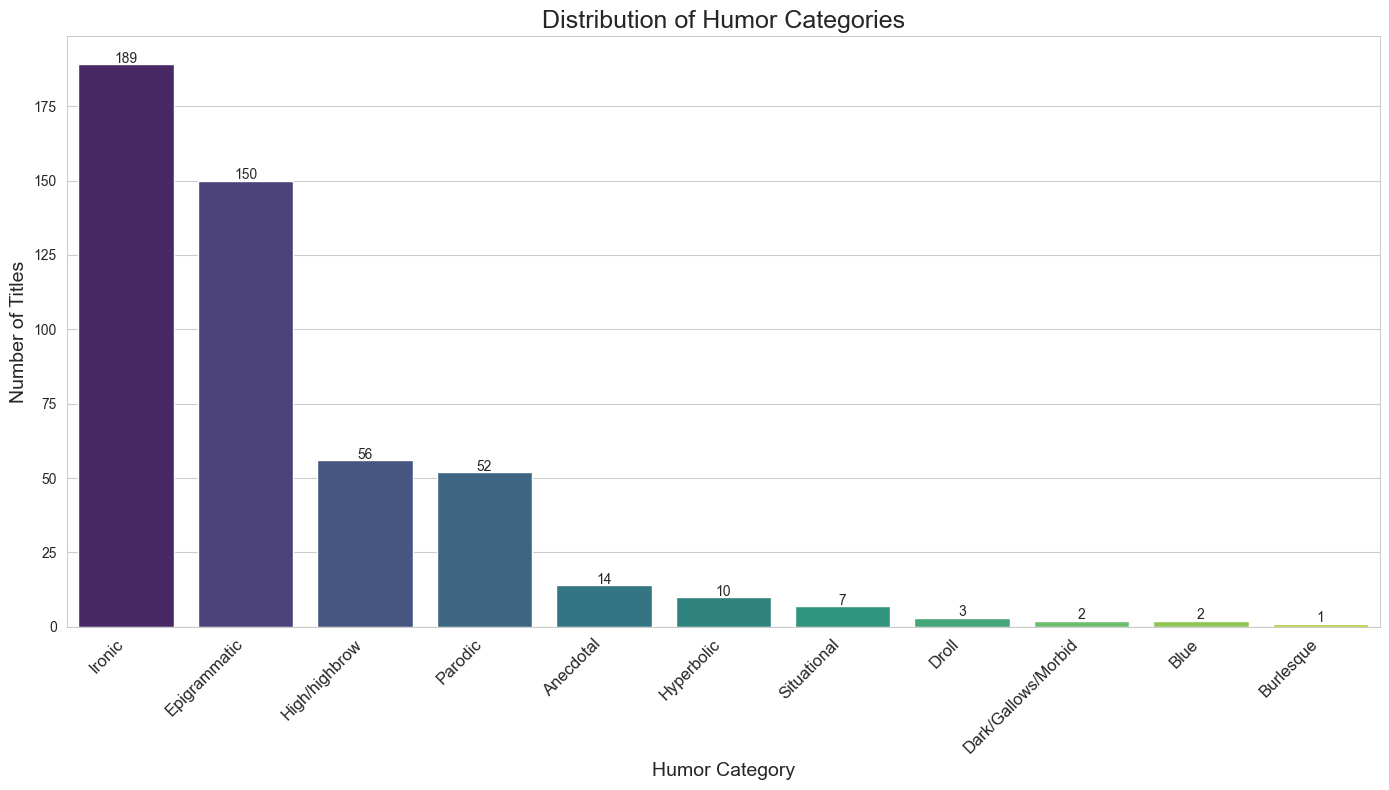


--- Invalid Categories Found ---
             Category  Count
11         Burlesque.      1
12  Metaphoric/Ironic      1


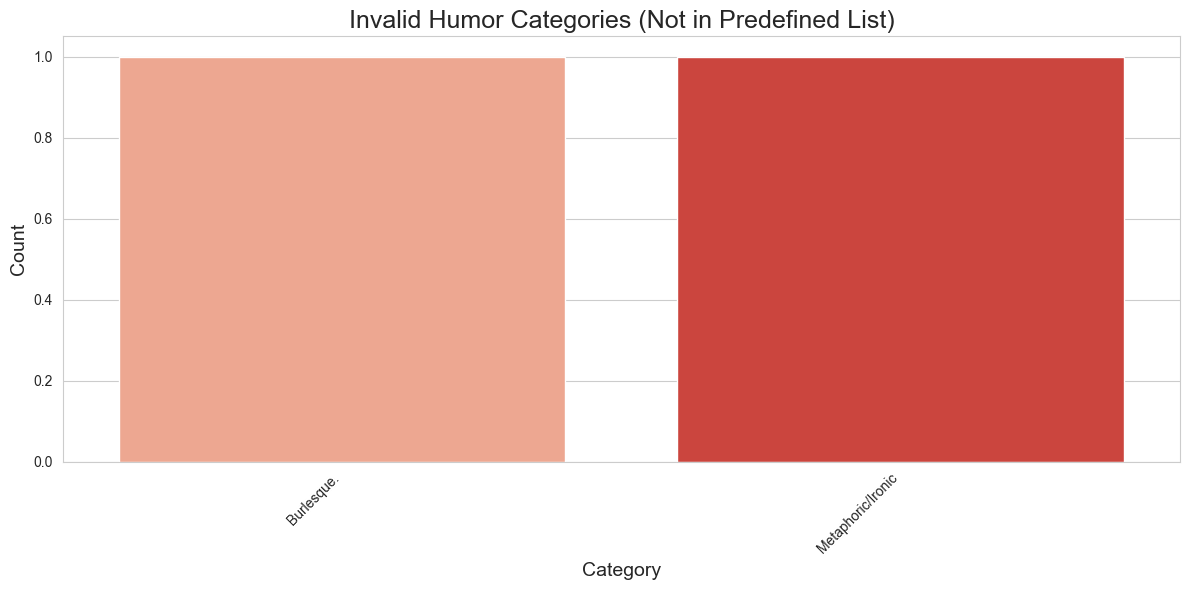

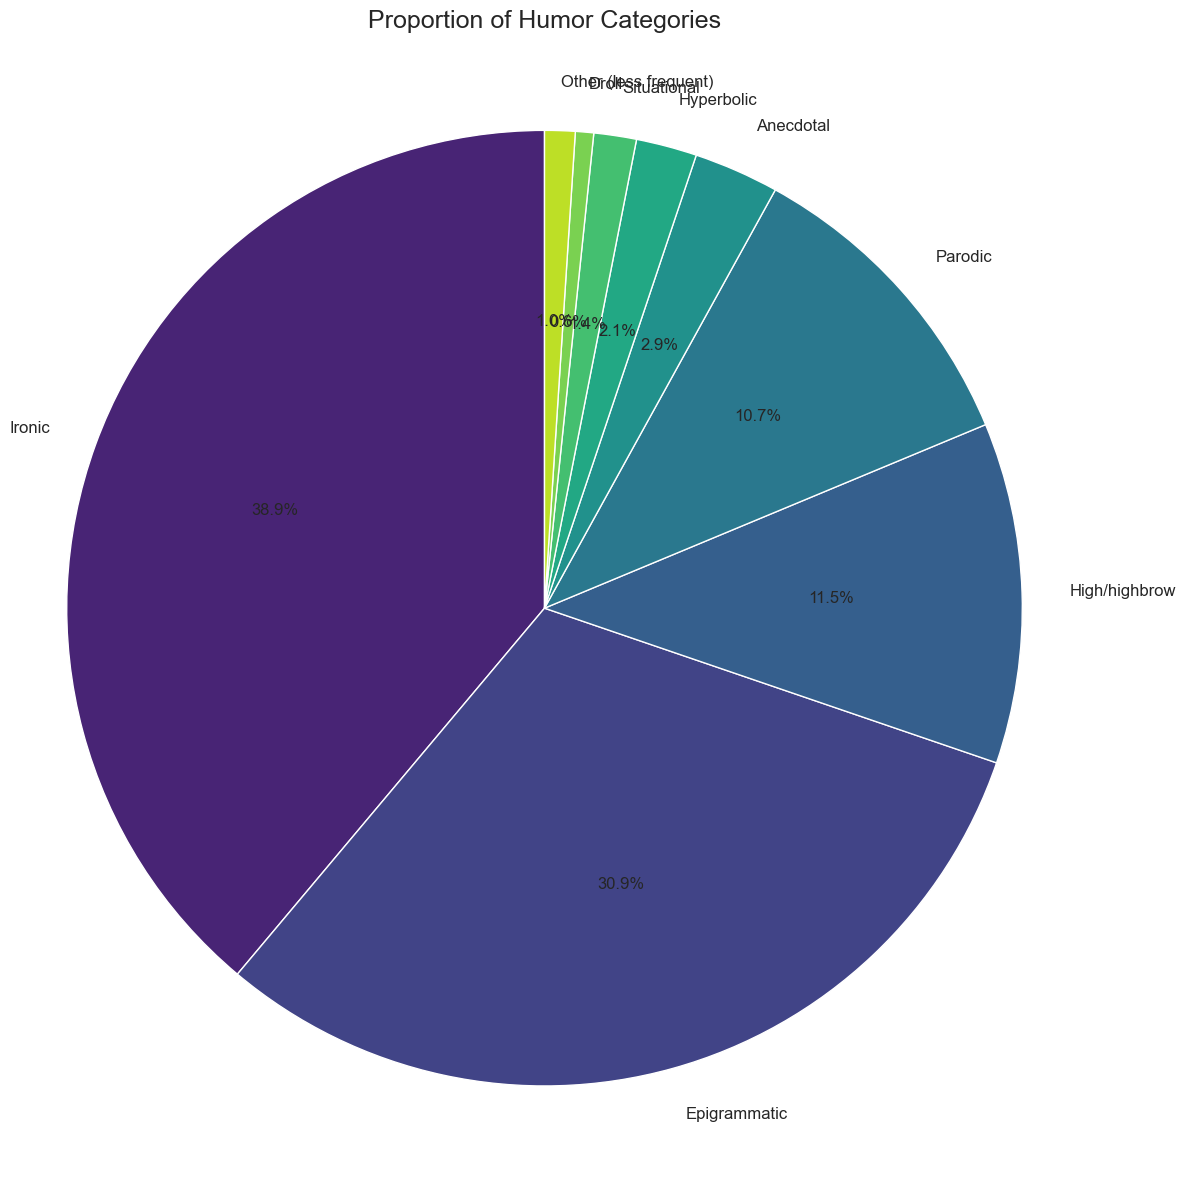


--- Categories Not Present in the Dataset ---
- Deadpan/Dry
- Farcical
- Juvenile/sophomoric
- Mordant
- Satirical
- Screwball
- Self-deprecating
- Slapstick
- Stand-up

--- Examples from Top Categories ---

Category: Ironic
Example 1:
  Original: "You are grounded!": Latent Name Artifacts in Pre-trained Language Models
  Created:  An Analysis of Bias and Name-Related Artifacts in Pre-Trained Language Models and Implications for Downstream Tasks
Example 2:
  Original: Nouns are Vectors, Adjectives are Matrices: Representing Adjective-Noun Constructions in Semantic Space
  Created:  A Data-Driven Method for Representing Adjective-Noun Compositions in Distributional Semantic Models

Category: Epigrammatic
Example 1:
  Original: Here's My Point: Joint Pointer Architecture for Argument Mining
  Created:  A Joint Neural Network Model for Link Extraction and Component Classification in Argument Mining Using Pointer Networks
Example 2:
  Original: Is it Time to Swish? Comparing Deep Learning

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the correct humor categories from the given list
VALID_CATEGORIES = [
    "Anecdotal", "Blue", "Burlesque", "Dark/Gallows/Morbid", "Deadpan/Dry", 
    "Droll", "Epigrammatic", "Farcical", "High/highbrow", "Hyperbolic",
    "Ironic", "Juvenile/sophomoric", "Mordant", "Parodic", "Satirical",
    "Screwball", "Self-deprecating", "Situational", "Slapstick", "Stand-up"
]

# Load the results data
results_file = 'humor_classification_results.csv'
df = pd.read_csv(results_file)

print(f"Total entries in dataset: {len(df)}")

# Extract the humor category column
humor_categories = df['humor_category']

# Count the occurrences of each category
category_counts = humor_categories.value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Identify categories not in the valid list
valid_mask = category_counts['Category'].isin(VALID_CATEGORIES)
valid_categories = category_counts[valid_mask]
invalid_categories = category_counts[~valid_mask]

# Print statistics
print("\n--- Category Statistics ---")
print(f"Number of unique categories: {len(category_counts)}")
print(f"Valid categories found: {len(valid_categories)}")
print(f"Invalid categories found: {len(invalid_categories)}")

# Sort valid categories by count (descending)
valid_categories = valid_categories.sort_values('Count', ascending=False)

# Set up the visualization
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot valid categories
ax = sns.barplot(x='Category', y='Count', data=valid_categories, palette='viridis')

# Customize the plot
plt.title('Distribution of Humor Categories', fontsize=18)
plt.xlabel('Humor Category', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Add count labels on top of bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5,
            f'{int(height)}',
            ha="center", fontsize=10)

# Save the plot

# Display the plot
plt.show()

# If invalid categories exist, show them too
if len(invalid_categories) > 0:
    print("\n--- Invalid Categories Found ---")
    print(invalid_categories)
    
    # Plot invalid categories
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Count', data=invalid_categories, palette='Reds')
    plt.title('Invalid Humor Categories (Not in Predefined List)', fontsize=18)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Generate a pie chart for overall distribution
plt.figure(figsize=(12, 12))
colors = sns.color_palette('viridis', len(valid_categories))

# Only include categories with significant counts for better readability
threshold = 3  # Minimum count to be shown separately in pie chart
significant_cats = valid_categories[valid_categories['Count'] >= threshold]
other_count = valid_categories[valid_categories['Count'] < threshold]['Count'].sum()

# Add "Other" category if needed
if other_count > 0:
    significant_cats = pd.concat([
        significant_cats, 
        pd.DataFrame({'Category': ['Other (less frequent)'], 'Count': [other_count]})
    ])

# Create pie chart
plt.pie(
    significant_cats['Count'], 
    labels=significant_cats['Category'], 
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(significant_cats)),
    startangle=90,
    shadow=False,
    textprops={'fontsize': 12}
)
plt.axis('equal')
plt.title('Proportion of Humor Categories', fontsize=18)
plt.tight_layout()
plt.show()

# Find missing categories (from the valid list but not present in data)
present_categories = set(valid_categories['Category'])
missing_categories = [cat for cat in VALID_CATEGORIES if cat not in present_categories]

if missing_categories:
    print("\n--- Categories Not Present in the Dataset ---")
    for cat in missing_categories:
        print(f"- {cat}")

# Show top 5 examples from the most common categories
print("\n--- Examples from Top Categories ---")
for category in valid_categories['Category'].head(3):  # Top 3 categories
    print(f"\nCategory: {category}")
    examples = df[df['humor_category'] == category][['original_title', 'created_title']].head(2)
    for i, (original, created) in enumerate(zip(examples['original_title'], examples['created_title'])):
        print(f"Example {i+1}:")
        print(f"  Original: {original}")
        print(f"  Created:  {created}")